## 그래프 탐색
방향이 없는 그래프에서는 어떻게 탐색해야 하는가?
 - DFS
 - BFS
여기서는 우선 몇가지 제한을 두고 시작한다.
 1. 무향 그래프이다.
 2. 

## Requirements

In [2]:
!pip install networkx

^C


## 시각화


In [3]:
graph = {
    1: [2, 3, 4],
    2: [5],
    3: [5],
    4: [2],
    5: [6],
    6: [],
}

In [72]:
import networkx as nx 
import matplotlib.pyplot as plt 

class GraphVisualization: 
	def __init__(self, graph):
		self.graph = []
		for i in graph:
			for j in graph[i]:
				self.graph.append([i,j])

	def addEdge(self, a, b): 
		temp = [a, b] 
		self.graph.append(temp) 

	def show(self): 
		G = nx.DiGraph()
		G.add_edges_from(self.graph) 
		nx.draw_networkx(G) 
		plt.show()

In [ ]:
G = GraphVisualization(graph)
G.show()

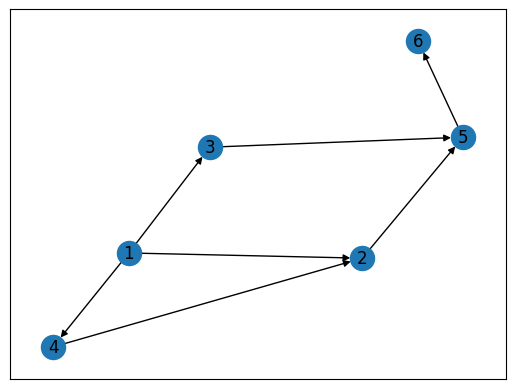

## DFS

In [75]:
# 재귀 구조를 이용한 DFS
visited = [0]*len(graph)
def dfs(vertex: int):
	visited[vertex-1] = 1
	print(vertex)
	for i in graph[vertex]:
		if visited[i-1]==0:
			dfs(i)
dfs(1)

1
2
5
6
3
4


In [76]:
# 스택을 이용한 DFS
vertex = 1
queue = [vertex]
visited = [0]*len(graph)
visited[vertex-1] = 1
while queue:
	print(vertex)
	for i in graph[vertex]:
		if visited[i-1]==0:
			visited[i-1] = 1
			queue.append(i)
	vertex = queue.pop()

1
4
3
5
6
2


## BFS

In [78]:
# 큐블 이용한 구현
vertex=1
queue = [vertex]
visited = [0]*len(graph)
while queue:
    vertex = queue.pop(0)
    print(vertex)
    for i in graph[vertex]:
        if visited[i-1]==0:
            visited[i-1] = 1
            queue.append(i)

1
2
3
4
5
6


## 위상 정렬

In [51]:
graph = {
    1: [2, 3, 4],
    2: [5],
    3: [5],
    4: [2],
    5: [6],
    6: [],
}

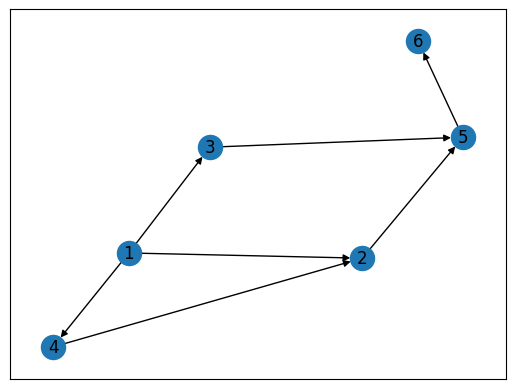

In [53]:
N = len(graph)
degree = [0]*N
visited = [0]*N
queue = []
for i in graph:
    for j in graph[i]:
        degree[j-1]+=1
for i in range(N):
    if degree[i]==0:
        queue.append(i)

visited[queue[0]] = 1
while queue:
    vertex = queue.pop(0)
    for v in graph[vertex+1]:
        degree[v-1]-=1
        if degree[v-1]==visited[v-1]==0:
            queue.append(v-1)
            visited[v-1] = 1
    print(vertex+1, end=" ")

1 3 4 2 5 6 

## 최소신장트리

In [ ]:
# 크루스칼 알고리즘 구현
class Graph:
    def __init__(self, vertices):
        self.V = vertices  # 정점의 개수
        self.edges = []    # 간선 리스트

    # 간선 추가
    def add_edge(self, u, v, w):
        self.edges.append([u, v, w])

### Kruskal

#### Union-find

In [ ]:
def find_group(group, x):
    if group[x] != x:
        group[x] = find_group(group, group[x])
        # x의 그룹을 포함하는 그룹을 찾아서, 각 그룹의 가장 번호가 작은 그룹 찾기
    return group[x]

def union_group(group, a, b): # 노드 그룹 작은 쪽으로 합치기
    a = find_group(group, a)
    b = find_group(group, b)
    if a < b:
        group[b] = a
    else:
        group[a] = b

#### Kruskal

In [ ]:
v, e = map(int, input().split())
group = [0] * (v+1) # 그룹 번호 리스트
for i in range(1, v+1):
    group[i] = i # 노드 별 그룹 번호 할당

edges = []
total_cost = 0

for _ in range(e):
    a, b, cost = map(int, input().split())
    edges.append((cost, a, b))

edges.sort()

for i in range(e):
    cost, a, b = edges[i]
    if find_group(group, a) != find_group(group, b): # 다른 그룹이면 사이클이 발생하지 않으므로
        union_group(group, a, b) # 두 그룹을 a, b로 연결하기
        total_cost += cost

print(total_cost)
